In [2]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
print("done")

done


In [3]:
import os
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
print("done")

2024-01-31 19:44:43.168243: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 19:44:45.282267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 19:44:45.283205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 19:44:49.789558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


done


In [4]:
from tensorflow import keras
print("done")

done


In [5]:
from tensorflow.keras import layers
print("done")

done


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
print("done")

done


In [7]:
from keras import models
print("done")

done


In [8]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("done")

done


<h3>Описание вспомогательных функций</h3>

In [9]:
def error(y_true, y_pred):
    print(f'{mean_absolute_error(y_true, y_pred)=}')
    print(f'{mean_absolute_percentage_error(y_true, y_pred)=}')
    print(f'{mean_squared_error(y_true, y_pred)=}') 
# ошибки

In [10]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel('data_cleaned.xlsx', index_col=0)

In [11]:
#Нормализация with MinMaxScaler

transformer = MinMaxScaler().fit(df)
col = df.columns
processed = transformer.transform(df)
df_norm = pd.DataFrame(processed, columns = col, index=df.index)
print("done")

done


In [26]:
dfpm = df_norm.copy(deep = True) 
dfpm
# делаем копию

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.275109,0.544652
3,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.365074
4,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.503211
5,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.544652
6,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.682789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.410540,0.552781,0.350139,0.333908,0.657301,0.161609,0.485125,0.480312,0.242759,1.0,0.627565,0.365347
1019,0.587163,0.650588,0.268550,0.712271,0.294428,0.350746,0.271207,0.475992,0.470745,0.221717,1.0,0.730963,0.458327
1020,0.555750,0.460227,0.251612,0.494656,0.623085,0.325580,0.572959,0.573346,0.578340,0.565435,1.0,0.286298,0.650046
1021,0.637396,0.691520,0.448724,0.684130,0.267818,0.444436,0.496511,0.536217,0.368070,0.451281,1.0,0.435716,0.520631


In [13]:
#Входные и выходные данные
inputcol = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2"
               ,"Потребление смолы, г/м2",
        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
result1 = ['Соотношение матрица-наполнитель']
result2 = ['Модуль упругости при растяжении, ГПа']
result3 = ['Прочность при растяжении, МПа']
X_train = dfpm[inputcol]
y_train1 = dfpm[result1]
y_train2 = dfpm[result2]
y_train3 = dfpm[result3]

In [14]:

Xtrn1, Xtest1, Ytrn1, Ytest1 = train_test_split(X_train, y_train1, test_size=0.3, random_state=42)
Xtrn2, Xtest2, Ytrn2, Ytest2 = train_test_split(X_train, y_train2, test_size=0.3, random_state=42)
Xtrn3, Xtest3, Ytrn3, Ytest3 = train_test_split(X_train, y_train3, test_size=0.3, random_state=42)

In [15]:
def build_model():
    model=models.Sequential() 
    model.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn1.shape[1],)))
    model.add(layers.Dense(64, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # выбрать метрику
    return model
# строим модель

In [16]:
k = 4 
num_val_samples = len(Xtrn1) // k
num_epochs = 50
all_scores = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = Xtrn1[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Ytrn1[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [Xtrn1[:i * num_val_samples],
         Xtrn1[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Ytrn1[:i * num_val_samples],
         Ytrn1[(i + 1) * num_val_samples:]],
        axis=0)
    
 
    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print("done")    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
done


In [17]:
all_scores 

[0.14663442969322205,
 0.14152252674102783,
 0.14068378508090973,
 0.14971597492694855]

In [18]:
np.mean(all_scores) 

0.14463917911052704

In [19]:
num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #%d' % i)
    val_data = Xtrn1[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Ytrn1[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [Xtrn1[:i * num_val_samples],
         Xtrn1[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Ytrn1[:i * num_val_samples],
         Ytrn1[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
print("done")

processing fold #0
processing fold #1
processing fold #2
processing fold #3
done


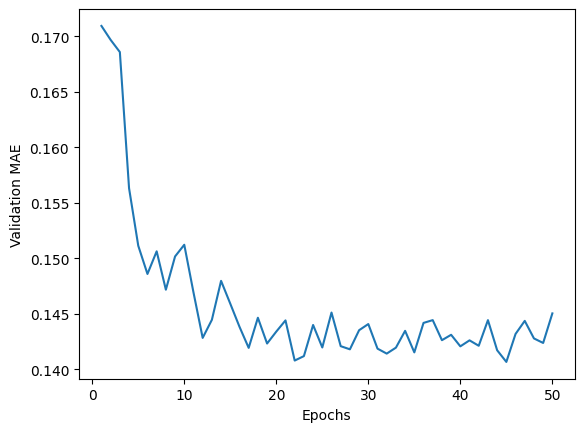

In [20]:
average_mae_history =[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

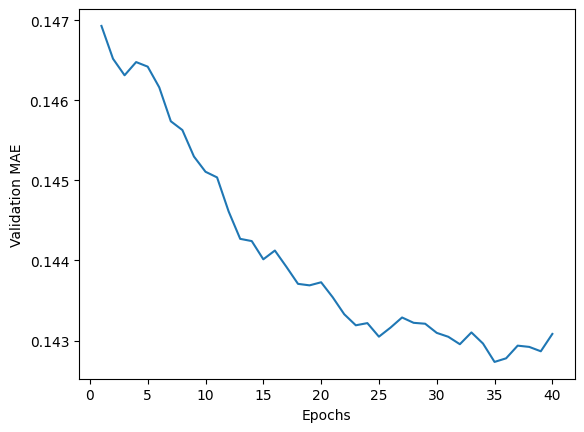

In [22]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:

model= build_model()

model.fit(Xtrn1, Ytrn1,
         epochs=30, batch_size=4, verbose=1)
test_mse_score, test_mae_score = model.evaluate(Xtest1, Ytest1)

Epoch 1/30
175/175 [==============================] - 0s 782us/step - loss: 0.0434 - mae: 0.1687
Epoch 2/30
175/175 [==============================] - 0s 768us/step - loss: 0.0384 - mae: 0.1563
Epoch 3/30
175/175 [==============================] - 0s 785us/step - loss: 0.0378 - mae: 0.1560
Epoch 4/30
175/175 [==============================] - 0s 776us/step - loss: 0.0356 - mae: 0.1507
Epoch 5/30
175/175 [==============================] - 0s 776us/step - loss: 0.0355 - mae: 0.1524
Epoch 6/30
175/175 [==============================] - 0s 785us/step - loss: 0.0355 - mae: 0.1505
Epoch 7/30
175/175 [==============================] - 0s 775us/step - loss: 0.0346 - mae: 0.1493
Epoch 8/30
175/175 [==============================] - 0s 777us/step - loss: 0.0341 - mae: 0.1472
Epoch 9/30
175/175 [==============================] - 0s 776us/step - loss: 0.0339 - mae: 0.1503
Epoch 10/30
175/175 [==============================] - 0s 777us/step - loss: 0.0330 - mae: 0.1452
Epoch 11/30
175/175 [========

In [66]:
test_mae_score

0.14409232139587402

In [67]:
y_pred1 = model.predict(Xtest1)

error(y_pred1, Ytest1)
Xtest1

10/10 [==============================] - 0s 708us/step
mean_absolute_error(y_true, y_pred)=0.144092303602837
mean_absolute_percentage_error(y_true, y_pred)=0.3151502951267009
mean_squared_error(y_true, y_pred)=0.0329500526996221


,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
537,0.509153,0.259198,0.833186,0.858396,0.542777,0.310748,0.826006,0.0,0.395193,0.606088
756,0.471233,0.210160,0.406082,0.489163,0.914348,0.169342,0.577467,1.0,0.493100,0.383679
759,0.700658,0.088539,0.287928,0.642083,0.411889,0.554467,0.475626,1.0,0.370668,0.447643
677,0.579370,0.420160,0.748506,0.974736,0.568609,0.612703,0.095559,1.0,0.760333,0.321540
423,0.373827,0.378414,0.512036,0.300015,0.388094,0.662721,0.258116,0.0,0.605451,0.462826
...,...,...,...,...,...,...,...,...,...,...
483,0.760172,0.393657,0.455692,0.762389,0.599349,0.455127,0.593013,0.0,0.381818,0.628311
958,0.480576,0.204933,0.996825,0.371747,0.692817,0.704978,0.752250,1.0,0.472654,0.615517
441,0.352255,0.168967,0.415156,0.164165,0.497721,0.054555,0.790104,0.0,0.084491,0.587531
9,0.772842,0.861312,0.608021,0.418887,0.549664,0.782031,0.748729,0.0,0.483401,0.544652


In [71]:
dfpm.iloc[958]

Соотношение матрица-наполнитель         0.264440
Плотность, кг/м3                        0.813994
модуль упругости, ГПа                   0.515075
Количество отвердителя, м.%             0.484438
Содержание эпоксидных групп,%_2         0.713817
Температура вспышки, С_2                0.785071
Поверхностная плотность, г/м2           0.562840
Модуль упругости при растяжении, ГПа    0.665199
Прочность при растяжении, МПа           0.499482
Потребление смолы, г/м2                 0.462718
Угол нашивки, град                      1.000000
Шаг нашивки                             0.198021
Плотность нашивки                       0.631115
Name: 981, dtype: float64

In [70]:
Ytest1.loc[958]

Соотношение матрица-наполнитель    0.431302
Name: 958, dtype: float64

In [ ]:
print('Метрики для параметра "Соотношение матрица-наполнитель"')
error(X_test_2['pred1'], df.loc[Ytest1.index.tolist()]['Соотношение матрица-наполнитель']) 
print('Метрики для параметра "Модуль упругости при растяжении, ГПа"')
error(X_test_2['pred2'], df.loc[Ytest2.index.tolist()]['Модуль упругости при растяжении, ГПа']) 
print('Метрики для параметра "Прочность при растяжении, МПа"')
error(X_test_2['pred3'], df.loc[Ytest3.index.tolist()]['Прочность при растяжении, МПа']) 